<a href="https://colab.research.google.com/github/sundar-nallalagappan/Coursera_NLP_assignments/blob/main/Generating_Text_from_Irish_Lyrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("sairam")

sairam


Generating Text from Irish Lyrics

In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
# Download the dataset
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: /content/irish-lyrics-eof.txt
100% 69.0k/69.0k [00:00<00:00, 92.9MB/s]


In [4]:
data = open("/content/irish-lyrics-eof.txt", "r").read()

corpus = data.split('\n')
print(f"number of sentences: {len(corpus)}")
corpus

number of sentences: 1693


['Come all ye maidens young and fair',
 'And you that are blooming in your prime',
 'Always beware and keep your garden fair',
 'Let no man steal away your thyme',
 'For thyme it is a precious thing',
 'And thyme brings all things to my mind',
 'nlyme with all its flavours, along with all its joys',
 'Thyme, brings all things to my mind',
 'Once I and a bunch of thyme',
 'i thought it never would decay',
 'Then came a lusty sailor',
 'Who chanced to pass my way',
 'And stole my bunch of thyme away',
 'The sailor gave to me a rose',
 'A rose that never would decay',
 'He gave it to me to keep me reminded',
 'Of when he stole my thyme away',
 'Sleep, my child, and peace attend thee',
 'All through the night',
 'Guardian angels God will send thee',
 'Soft the drowsy hours are creeping',
 'Hill and dale in slumber sleeping',
 'I my loving vigil keeping',
 'While the moon her watch is keeping',
 'While the weary world is sleeping',
 'Oer thy spirit gently stealing',
 'Visions of delight rev

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
print(f"Number of unique words in vocab {len(word_index)}")
print(list(zip(word_index.keys(), word_index.values()))[0:10])

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(word_index) + 1

Number of unique words in vocab 2689
[('the', 1), ('and', 2), ('i', 3), ('to', 4), ('a', 5), ('of', 6), ('my', 7), ('in', 8), ('me', 9), ('for', 10)]


In [6]:
sequences = tokenizer.texts_to_sequences(corpus)
max_seq_len = np.max([len(row) for row in sequences])
print(sequences[0:10])

[[51, 12, 96, 1217, 48, 2, 69], [2, 11, 15, 31, 361, 8, 24, 1218], [272, 798, 2, 204, 24, 579, 69], [118, 35, 119, 799, 56, 24, 184], [10, 184, 25, 23, 5, 580, 456], [2, 184, 800, 12, 801, 4, 7, 235], [1219, 17, 12, 75, 1220, 236, 17, 12, 75, 802], [184, 800, 12, 801, 4, 7, 235], [152, 3, 2, 5, 803, 6, 184], [3, 362, 25, 49, 83, 457]]


In [7]:
input_sequences = []

for row in corpus:
  token_text = tokenizer.texts_to_sequences([row])[0]

  for i in range(len(token_text)):
    n_gram_seq = token_text[:i+1]
    input_sequences.append(n_gram_seq)

input_sequences[0:20]

[[51],
 [51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24]]

In [8]:
padded = pad_sequences(input_sequences, maxlen=max_seq_len, padding="pre")
padded[0:20]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   51],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,   51,   12],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   51,   12,   96],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   51,   12,   96, 1217],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          51,   12,   96, 1217,   48],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   51,
          12,   96, 1217,   48,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,   51,   12,
          96, 1217,   48,    2,   69],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [9]:
Xs = padded[:,:-1]
labels = padded[:,-1]

print(Xs.shape, labels.shape)

Ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
print(Ys.shape)

(13730, 15) (13730,)
(13730, 2690)


In [10]:
labels[0], Ys[0]

(51, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

In [14]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(64)))
#model.add(Bidirectional(LSTM(32)))
model.add(Dense(Ys.shape[1], "softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 15, 64)            172160    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 2690)              347010    
                                                                 
Total params: 585,218
Trainable params: 585,218
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(Xs, Ys, epochs=100, batch_size=8)

Epoch 1/100
1717/1717 [==============================] - 27s 13ms/step - loss: 6.5414 - accuracy: 0.0792
Epoch 2/100
1717/1717 [==============================] - 14s 8ms/step - loss: 5.7320 - accuracy: 0.1196
Epoch 3/100
1717/1717 [==============================] - 14s 8ms/step - loss: 5.0919 - accuracy: 0.1506
Epoch 4/100
1717/1717 [==============================] - 13s 8ms/step - loss: 4.4967 - accuracy: 0.1821
Epoch 5/100
1717/1717 [==============================] - 13s 8ms/step - loss: 4.0344 - accuracy: 0.2171
Epoch 6/100
1717/1717 [==============================] - 13s 8ms/step - loss: 3.6496 - accuracy: 0.2578
Epoch 7/100
1717/1717 [==============================] - 13s 8ms/step - loss: 3.3812 - accuracy: 0.2929
Epoch 8/100
1717/1717 [==============================] - 13s 8ms/step - loss: 3.1585 - accuracy: 0.3248
Epoch 9/100
1717/1717 [==============================] - 13s 8ms/step - loss: 3.0088 - accuracy: 0.3462
Epoch 10/100
1717/1717 [==============================] - 13s 8

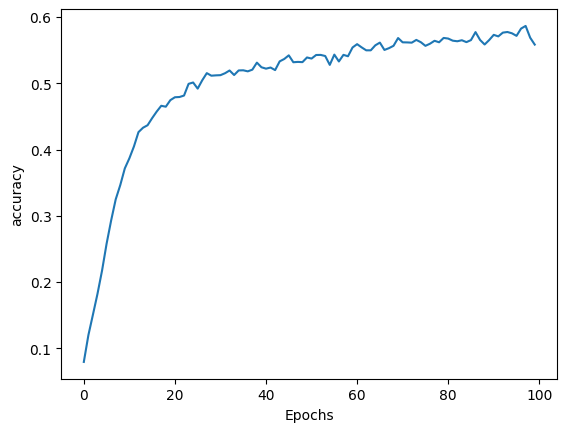

In [16]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

In [22]:
num_words = 100
seed_text = "help me obi-wan kinobi youre my only hope"

for i in range(num_words):
  seed_token = tokenizer.texts_to_sequences([seed_text])[0]
  padded_seed_token = pad_sequences([seed_token], maxlen=max_seq_len-1, padding="pre")
  #padded_seed_token
  y_prob = model.predict(padded_seed_token)
  Y_pred = tokenizer.index_word.get((np.argmax(y_prob)))

  if np.argmax(y_prob) != 0: #0 is  is 0 because that is just the padding.
    print(Y_pred)
    seed_text += " " + Y_pred


1/1 [==============================] - 0s 20ms/step
mornin
1/1 [==============================] - 0s 19ms/step
early
1/1 [==============================] - 0s 20ms/step
to
1/1 [==============================] - 0s 21ms/step
loved
1/1 [==============================] - 0s 20ms/step
ones
1/1 [==============================] - 0s 20ms/step
and
1/1 [==============================] - 0s 21ms/step
the
1/1 [==============================] - 0s 21ms/step
morning
1/1 [==============================] - 0s 20ms/step
air
1/1 [==============================] - 0s 19ms/step
has
1/1 [==============================] - 0s 19ms/step
turn
1/1 [==============================] - 0s 18ms/step
one
1/1 [==============================] - 0s 20ms/step
barley
1/1 [==============================] - 0s 20ms/step
can
1/1 [==============================] - 0s 48ms/step
be
1/1 [==============================] - 0s 38ms/step
never
1/1 [==============================] - 0s 35ms/step
one
1/1 [===========================

In [23]:
seed_text

'help me obi-wan kinobi youre my only hope mornin early to loved ones and the morning air has turn one barley can be never one wedding more me to young can as dear hand while thy true neer as young father bann fortune wedding'

In [42]:
choice = np.random.choice([1,2,3])
np.argsort(y_prob)[0][-choice]

16

In [33]:
np.argsort(y_prob)

array([[ 995,  554, 2550, ...,   12,   16,    0]])

In [32]:
np.argmax(y_prob)

0